In [ ]:
# 2023.5.1
# reconstructed code 

# total random init
# poly function

In [ ]:
import os

cuda_device = '3'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train




In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [10, 20, 40]


result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    

            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)

        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()

            result_matrix[i, idx, :] = [error, error_infty]

    

    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[0.11960118 0.76066548]
  [0.07118394 0.85611045]
  [0.03039369 0.38639212]
  [0.04266857 0.62589884]
  [0.01136391 0.1934164 ]
  [0.03220138 0.7207967 ]
  [0.05374073 0.58629972]
  [0.04087247 0.53565097]
  [0.02700864 0.31268388]
  [0.10212667 0.86696619]]

 [[0.06274831 0.8090862 ]
  [0.03826528 0.70318073]
  [0.05110398 0.46787086]
  [0.05396847 0.83201766]
  [0.00124369 0.09018248]
  [0.04591749 0.73442036]
  [0.05871015 0.6425299 ]
  [0.03071367 0.41027009]
  [0.00954895 0.27468514]
  [0.01850708 0.43537587]]

 [[0.01157575 0.41133463]
  [0.00771463 0.27863759]
  [0.03931099 0.76891029]
  [0.06074201 0.67342889]
  [0.02952446 0.48932475]
  [0.04870674 0.65097165]
  [0.01554387 0.48104787]
  [0.00886177 0.34418344]
  [0.02523925 0.50603759]
  [0.01090114 0.21590513]]]


(3, 10, 2)
0.5335401704948676
<class 'numpy.ndarray'>
0.0
[0.04353903 0.02559193 0.02025474]
[0.53354017 0.46398612 0.45019282]
y_min: [0.01136391 0.00124369 0.00771463]
y_max: [0.11960118 0.06274831 0.06074201]
[[0.03217512 0.02434824 0.01254011]
 [0.07606215 0.03715638 0.04048727]]


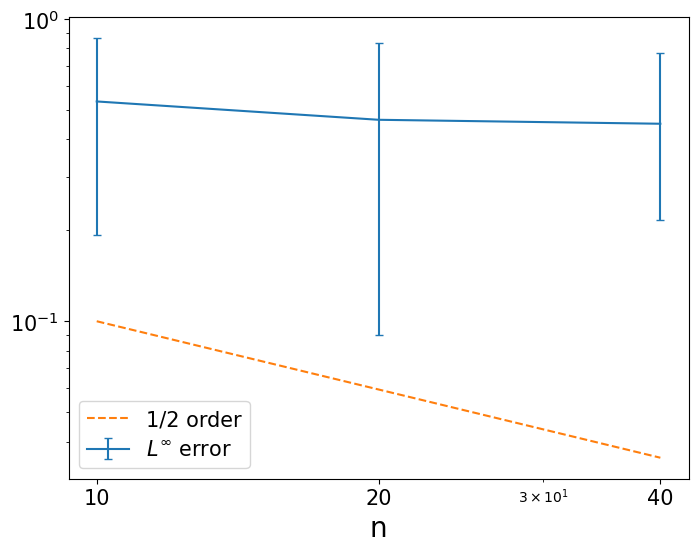

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))



mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])



print(mean)
print(mean_inf)


y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]


ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()